# Import Libraries

In [43]:
import pandas as pd
import requests
from pandas.io.json import json_normalize
import numpy as np
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt


# Gather initial data - Boston Districts

#### Foursquare Credentials

In [44]:
labelResteraunt = "Mexican Restaurant"
LIMIT = 100

In [45]:
CLIENT_ID = 'H02GZU3YVDIY5GWT3JMWZ0VZQS1K10ZE5DHV13F03PHY5TUB' # your Foursquare ID
CLIENT_SECRET = 'Q1CEIAOSDCGVEFYCZ3FY3303UJVYN04ZFJAAMXQGDT3EAMOR' # your Foursquare Secret
VERSION = '20180605'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H02GZU3YVDIY5GWT3JMWZ0VZQS1K10ZE5DHV13F03PHY5TUB
CLIENT_SECRET:Q1CEIAOSDCGVEFYCZ3FY3303UJVYN04ZFJAAMXQGDT3EAMOR


#### Load in Boston District Data

In [46]:
#Loads data from a csv file and puts it into a table using pandas
boston_nh = pd.read_csv('bostonneighborhoods.csv')
boston_nh.head()

,Neighborhood,Latitude,Longitude
0,Allson,42.352900,71.132100
1,Back Bay,42.351294,-71.080356
2,Bay Village,42.349100,-71.068000
3,Beacon Hill,42.358300,-71.066100
4,Brighton,42.346400,-71.162700


In [47]:
#Loads data from a csv file and puts it into a table using pandas
#boston_pop = pd.read_csv('bostonpop.csv')
#boston_pop.head()

#### Combine the two datasets together

In [48]:
#boston_combined = boston_nh.join(boston_pop.set_index('Neighborhood'), on='Neighborhood')
#boston_combined.head()

### List of Resteraunt types

In [49]:
# Url : https://developer.foursquare.com/docs/build-with-foursquare/categories

food_venues = {
'foursquareID_food'     : "4d4b7105d754a06374d81259",
'foursquareID_african'  : "4bf58dd8d48988d1c8941735",
'foursquareID_american' : "4bf58dd8d48988d14e941735",
'foursquareID_asian'    : "4bf58dd8d48988d142941735",
'foursquareID_chinese'  : "4bf58dd8d48988d145941735",
'foursquareID_japanese' : "4bf58dd8d48988d111941735",
'foursquareID_korean'   : "4bf58dd8d48988d113941735",
'foursquareID_thai'     : "4bf58dd8d48988d149941735",
'foursquareID_bbq'      : "4bf58dd8d48988d1df931735",
'foursquareID_buffet'   : '52e81612bcbc57f1066b79f4',
'foursquareID_burger'   : '4bf58dd8d48988d16c941735',
'foursquareID_fish'     : '4edd64a0c7ddd24ca188df1a',
'foursquareID_french'   : '4bf58dd8d48988d10c941735',
'foursquareID_german'   : '4bf58dd8d48988d10d941735',
'foursquareID_greek'    : '4bf58dd8d48988d10e941735',
'foursquareID_indian'   : '4bf58dd8d48988d10f941735',
'foursquareID_italian'  : '4bf58dd8d48988d110941735',
'foursquareID_latin'    : '4bf58dd8d48988d1be941735',
'foursquareID_mexian'   : '4bf58dd8d48988d1c1941735',
'foursquareID_med'      : '4bf58dd8d48988d1c0941735',
'foursquareID_middleE'  : '4bf58dd8d48988d115941735',
'foursquareID_pizza'    : '4bf58dd8d48988d1ca941735',
'foursquareID_southern' : '4bf58dd8d48988d14f941735',
'foursquareID_spanish'  : '4bf58dd8d48988d150941735',
'foursquareID_steak'    : '4bf58dd8d48988d1cc941735',
'foursquareID_turkish'  : '4f04af1f2fb6e1c99f3db0bb'
}

venue_ids = (list(food_venues.values()))
#venue_ids = ["4d4b7105d754a06374d81259",'4bf58dd8d48988d142941735']

### Pull data from Foursquare

In [50]:
def getVenues(names, latitudes, longitudes, radius, category):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            category)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    boston_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    boston_venues.columns = ['Neighborhood', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(boston_venues)

In [51]:
venueInfo = []
LIMIT = 100
radius = 1000
for cID in venue_ids:
    print(cID)
    try:
        boston_venues = getVenues(names=boston_nh['Neighborhood'],
                                           latitudes=boston_nh['Latitude'],
                                           longitudes=boston_nh['Longitude'],
                                           radius = radius,
                                           category = cID
                                          )
        venueInfo.append(boston_venues)
    except: pass

4d4b7105d754a06374d81259
4bf58dd8d48988d1c8941735
4bf58dd8d48988d14e941735
4bf58dd8d48988d142941735
4bf58dd8d48988d145941735
4bf58dd8d48988d111941735
4bf58dd8d48988d113941735
4bf58dd8d48988d149941735
4bf58dd8d48988d1df931735
52e81612bcbc57f1066b79f4
4bf58dd8d48988d16c941735
4edd64a0c7ddd24ca188df1a
4bf58dd8d48988d10c941735
4bf58dd8d48988d10d941735
4bf58dd8d48988d10e941735
4bf58dd8d48988d10f941735
4bf58dd8d48988d110941735
4bf58dd8d48988d1be941735
4bf58dd8d48988d1c1941735
4bf58dd8d48988d1c0941735
4bf58dd8d48988d115941735
4bf58dd8d48988d1ca941735
4bf58dd8d48988d14f941735
4bf58dd8d48988d150941735
4bf58dd8d48988d1cc941735
4f04af1f2fb6e1c99f3db0bb


### Combine the total datasets into one Frame, remove non-unique's

In [52]:
header = ['Neighborhood','Venue','Venue Latitude','Venue Longitude','Venue Category']
totalData = pd.DataFrame(columns=header)
#-----------------------------------------------
for k in venueInfo:
    totalData = pd.concat([k, totalData], ignore_index=True,sort=True)

totalData = pd.DataFrame.drop_duplicates(totalData)
totalData.reset_index(drop=True, inplace=True)


In [53]:
len(totalData)

3950

### Setup the X values used for Clustering

In [54]:
clusterList,longList,latList = [], [], []
labels = []
#clusterArray = np.array([])

for row in range(len(totalData)):
    long = totalData.at[row, "Venue Longitude"]
    lat  = totalData.at[row, "Venue Latitude"]
    #---------------------------------
    labels.append(totalData.at[row, "Venue Category"])
    clusterList.append( (long,lat) )
    longList.append(long) # Used for making maps later
    latList.append(lat) # Used for making maps later

### Graph Current Locations

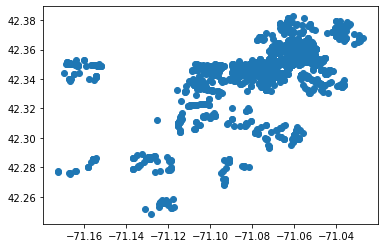

In [55]:
#list1 = arr.tolist()
plt.scatter(longList, latList)

# DBScan

#### Now we run the code through DB Scan to make the groups

In [56]:
# Epsilon dictates how tight the density groups can be.
# Min samples says how few data points are needed for a cluster to form
# Cluster list is a numpy array containing the X and Y coordinates of every Venue
dbScan = DBSCAN(eps=0.001, min_samples=5).fit_predict(clusterList) 

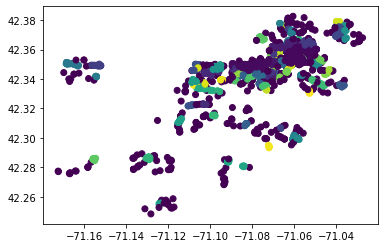

In [57]:
plt.scatter(longList, latList, c=dbScan)

### Now that we have the clusters, we can figure out how many venue's are in each

In [58]:
# Lets figure out how many clusters have been made
clusterResultList = []
for k in dbScan:
    clusterResultList.append(str(k))

clusterList = list(set(clusterResultList))
if "-1" in clusterList: clusterList.remove("-1")

print(len(clusterList))

97


### Lets get the amount of resteraunts per district

In [59]:
numberOfResterauntsPerCluster = []
for c in clusterList:
    counter = 0
    for k in clusterResultList:
        if k == c:
            counter+=1
    numberOfResterauntsPerCluster.append(counter)
#numberOfResterauntsPerCluster

In [60]:
numberOfMexicanPerCluster = []

for c in clusterList:
    counter = 0
    for idx in range(len(clusterResultList)):
        if c == clusterResultList[idx]: # This means that the district and catagory algin
            if labels[idx] == labelResteraunt:
                counter+=1
    numberOfMexicanPerCluster.append(counter)
#numberOfMexicanPerCluster

### Now, we generate a table to show value of each cluster

In [61]:
totalVenues = len(clusterResultList)
finalResults = []

for idx in range(len(clusterList)):
    weight = numberOfResterauntsPerCluster[idx]/totalVenues
    percentX = numberOfMexicanPerCluster[idx]/numberOfResterauntsPerCluster[idx]
    value = weight*percentX    
    if percentX !=0:
        finalResults.append( (clusterList[idx],value) )
        
finalResults

[('58', 0.0005063291139240507),
 ('12', 0.0007594936708860759),
 ('74', 0.00025316455696202533),
 ('71', 0.0005063291139240507),
 ('21', 0.00025316455696202533),
 ('8', 0.002531645569620253),
 ('3', 0.0007594936708860759),
 ('6', 0.0005063291139240507),
 ('32', 0.0030379746835443038),
 ('53', 0.0005063291139240507),
 ('65', 0.00025316455696202533),
 ('1', 0.01949367088607595),
 ('31', 0.0007594936708860759),
 ('51', 0.00025316455696202533),
 ('55', 0.00025316455696202533),
 ('0', 0.0005063291139240507),
 ('2', 0.004050632911392405),
 ('10', 0.0005063291139240507),
 ('89', 0.00025316455696202533),
 ('7', 0.0005063291139240507),
 ('16', 0.0015189873417721519),
 ('20', 0.0010126582278481013),
 ('76', 0.0005063291139240506),
 ('59', 0.0002531645569620253),
 ('48', 0.0010126582278481013),
 ('63', 0.0005063291139240507),
 ('22', 0.0002531645569620253)]

### Find the largest sector

In [62]:
maxValue, maxName = 0.000001, ''
for k in finalResults:
    print(k[1])
    if k[1] > maxValue:
        maxValue = k[1]
        maxName  = k[0]
        
print("Max id is : " + maxName)

0.0005063291139240507
0.0007594936708860759
0.00025316455696202533
0.0005063291139240507
0.00025316455696202533
0.002531645569620253
0.0007594936708860759
0.0005063291139240507
0.0030379746835443038
0.0005063291139240507
0.00025316455696202533
0.01949367088607595
0.0007594936708860759
0.00025316455696202533
0.00025316455696202533
0.0005063291139240507
0.004050632911392405
0.0005063291139240507
0.00025316455696202533
0.0005063291139240507
0.0015189873417721519
0.0010126582278481013
0.0005063291139240506
0.0002531645569620253
0.0010126582278481013
0.0005063291139240507
0.0002531645569620253
Max id is : 1


### Find the X/Y coordinates

In [63]:
counter, longCounter, latCounter = 0, 0.0, 0.0


for idx in range(len(clusterResultList)):
    if clusterResultList[idx] == maxName:
        counter+=1
        longCounter = longCounter + longList[idx]
        latCounter  = latCounter  + latList[idx]
        
print(f"The Area that could use additional {labelResteraunt} is around '{longCounter/counter}' Longitude and '{latCounter/counter}' Latitude in Boston")

The Area that could use additional Mexican Restaurant is around '-71.05890045602365' Longitude and '42.35555054151881' Latitude in Boston
